In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Tesis\bases_datos\real_estate_clean_ultimo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17713 entries, 0 to 17712
Columns: 138 entries, attribute_acceso_a_internet to dias_desde_fecha
dtypes: float64(17), int64(3), object(118)
memory usage: 18.6+ MB


In [6]:
df.columns.to_list()

['attribute_acceso_a_internet',
 'attribute_acceso_controlado',
 'attribute_admite_mascotas',
 'attribute_agua_corriente',
 'attribute_aire_acondicionado',
 'attribute_alarma',
 'attribute_altillo',
 'attribute_ambientes',
 'attribute_amoblado',
 'attribute_antigüedad',
 'attribute_apto_crédito',
 'attribute_apto_profesional',
 'attribute_ascensor',
 'attribute_balcón',
 'attribute_bauleras',
 'attribute_baños',
 'attribute_caldera',
 'attribute_calefacción',
 'attribute_cancha_de_básquetbol',
 'attribute_cancha_de_paddle',
 'attribute_cancha_de_tenis',
 'attribute_canchas_de_usos_múltiples',
 'attribute_cantidad_de_pisos',
 'attribute_chimenea',
 'attribute_cisterna',
 'attribute_cocheras',
 'attribute_cocina',
 'attribute_comedor',
 'attribute_con_barrio_cerrado',
 'attribute_con_cancha_de_fútbol',
 'attribute_con_cancha_polideportiva',
 'attribute_con_conexión_para_lavarropas',
 'attribute_con_energia_solar',
 'attribute_con_lavadero',
 'attribute_con_tour_virtual',
 'attribute_con_

In [5]:

# Convertir fechas a datetime
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')




In [6]:
df['year_created'] = df['date_created'].dt.year
df['month_created'] = df['date_created'].dt.month
df['day_created'] = df['date_created'].dt.day

df['year_updated'] = df['last_updated'].dt.year
df['month_updated'] = df['last_updated'].dt.month
df['day_updated'] = df['last_updated'].dt.day


In [7]:

plt.style.use('dark_background')  # Aplica un fondo oscuro

# Opcional: Configurar estilos adicionales de Seaborn
sns.set_style("darkgrid")  # Otros estilos disponibles: "whitegrid", "dark", "white", "ticks"

# Configurar colores de texto por defecto
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'figure.facecolor': '#2E2E2E',  # Color de fondo de la figura
    'axes.facecolor': '#2E2E2E',    # Color de fondo de los ejes
    'savefig.facecolor': '#2E2E2E'  # Color de fondo al guardar la figura
})


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\2944624976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')  # Puedes elegir otras paletas de colores


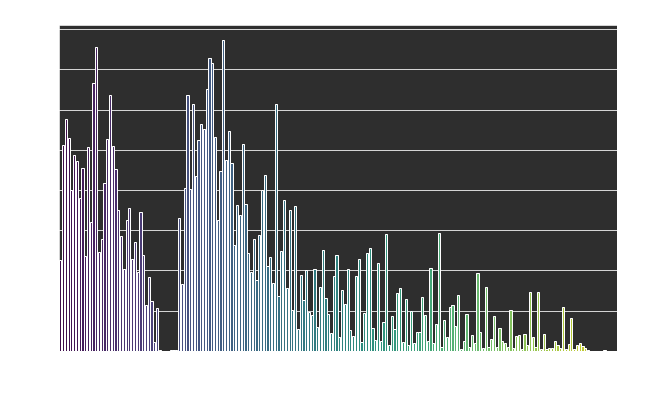

In [8]:

plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df, palette='viridis')  # Puedes elegir otras paletas de colores
plt.title('Distribución de Price Range', fontsize=16)
plt.xlabel('Rango de Precio', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\4188480982.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


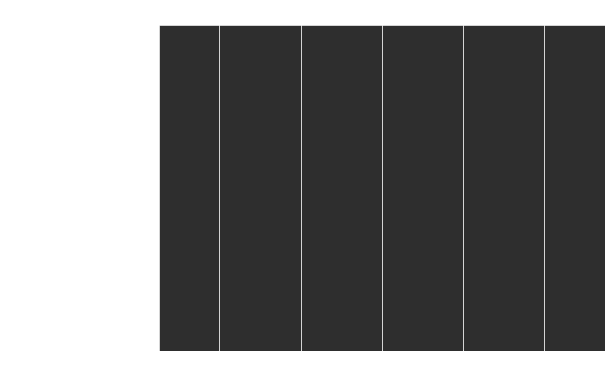

In [9]:
import pandas as pd

# Asegúrate de que 'price_range' esté codificada numéricamente si es necesario
# Por ejemplo:
df['price_range_encoded'] = df['price_range'].map({'Bajo': 0, 'Medio': 1, 'Alto': 2})

plt.figure(figsize=(8, 6))
corr = df.corr()['price_range_encoded'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlación de Variables Numéricas con Price Range', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.show()


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\852817404.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


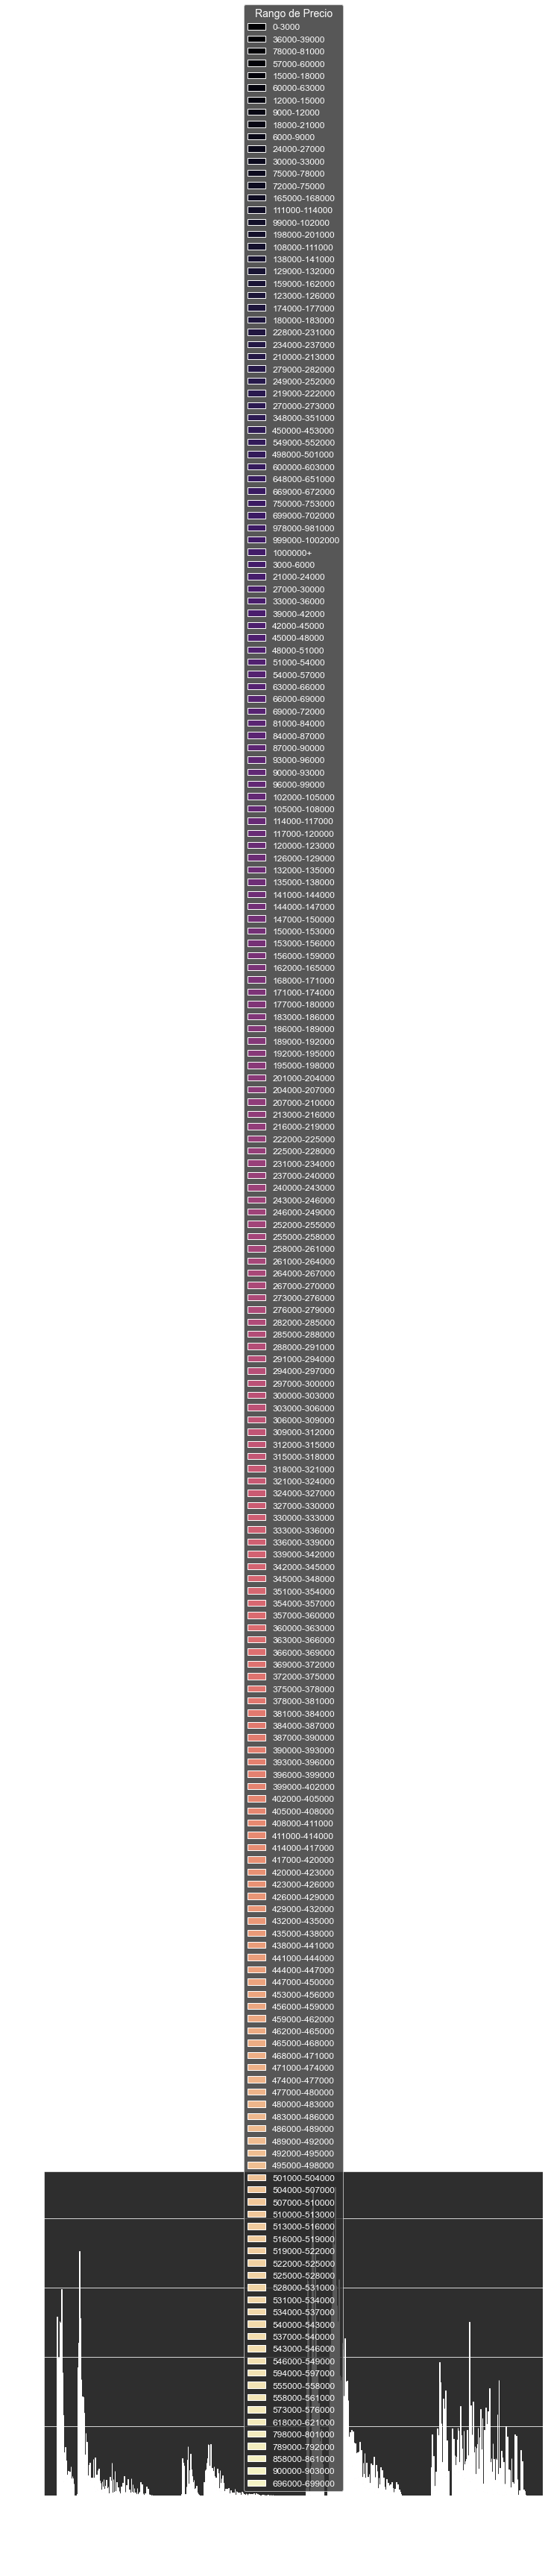

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='attribute_property_type', hue='price_range', data=df, palette='magma')
plt.title('Price Range por Tipo de Propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rango de Precio', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


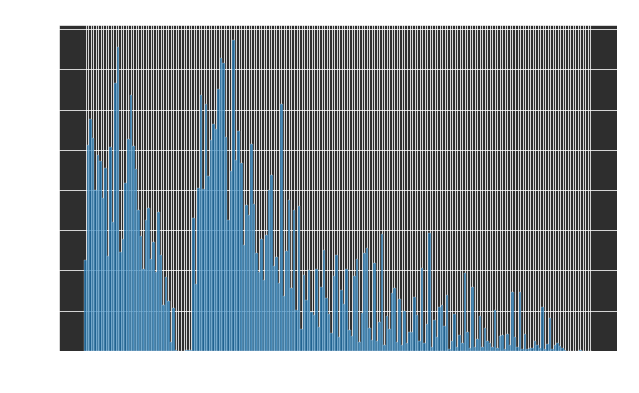

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_range'], bins=50, color='#1f77b4')  # Color de las barras
plt.title('Distribución de Precios', fontsize=16, color='white')
plt.xlabel('Precio', fontsize=14, color='white')
plt.ylabel('Frecuencia', fontsize=14, color='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()


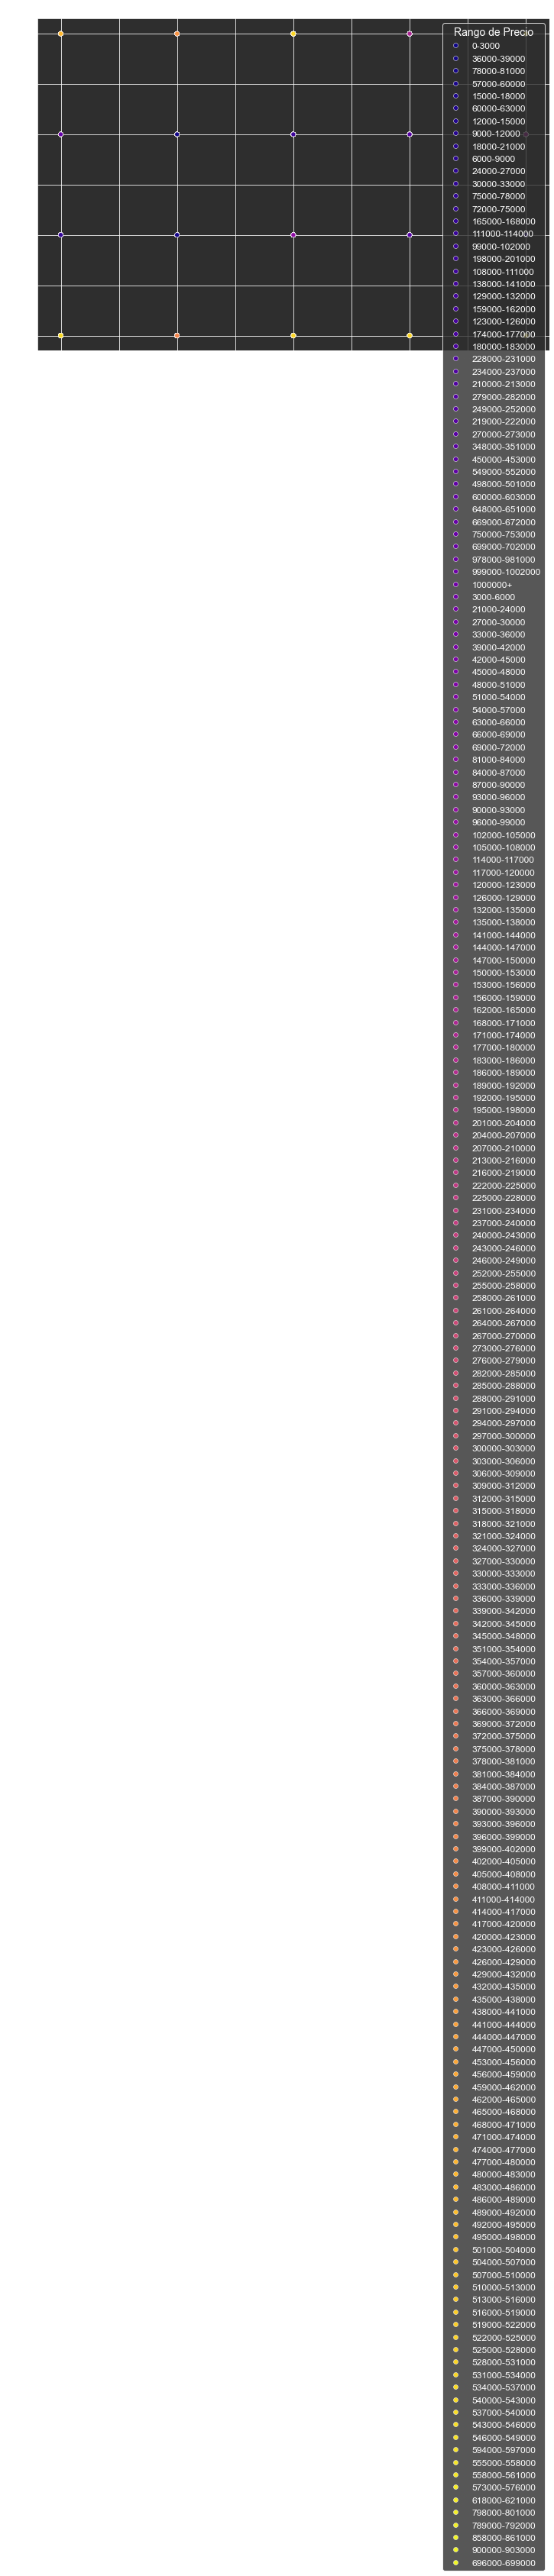

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='attribute_ambientes', y='attribute_baños', hue='price_range', palette='plasma')
plt.title('Relación entre Ambientes y Baños por Price Range', fontsize=16, color='white')
plt.xlabel('Cantidad de Ambientes', fontsize=14, color='white')
plt.ylabel('Cantidad de Baños', fontsize=14, color='white')
plt.legend(title='Rango de Precio', title_fontsize=14, fontsize=12, facecolor='#2E2E2E', edgecolor='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.show()


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\837122491.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attribute_property_type', y='attribute_baños', data=df, palette='deep')


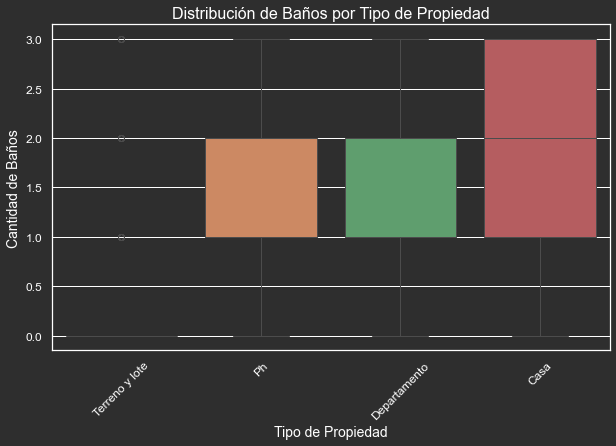

In [16]:
import seaborn as sns

# Definir un tema personalizado
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#2E2E2E",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "figure.facecolor": "#2E2E2E"
})

# Crear un gráfico de ejemplo
plt.figure(figsize=(10, 6))
sns.boxplot(x='attribute_property_type', y='attribute_baños', data=df, palette='deep')
plt.title('Distribución de Baños por Tipo de Propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=14)
plt.ylabel('Cantidad de Baños', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar un estilo de fondo oscuro
plt.style.use('dark_background')

# Configuraciones de Seaborn
sns.set_style("darkgrid")  # Opcional: "whitegrid", "dark", "white", "ticks"

# Actualizar parámetros de Matplotlib para texto blanco
plt.rcParams.update({
    'text.color': 'white',             # Color de todo el texto
    'axes.labelcolor': 'white',        # Color de las etiquetas de los ejes
    'xtick.color': 'white',            # Color de las marcas del eje x
    'ytick.color': 'white',            # Color de las marcas del eje y
    'axes.edgecolor': 'white',         # Color de los bordes de los ejes
    'figure.facecolor': '#2E2E2E',     # Fondo de la figura
    'axes.facecolor': '#2E2E2E',       # Fondo de los ejes
    'savefig.facecolor': '#2E2E2E'     # Fondo al guardar la figura
})


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\2716730394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis', alpha=0.8)


<AxesSubplot:xlabel='price_range', ylabel='count'>

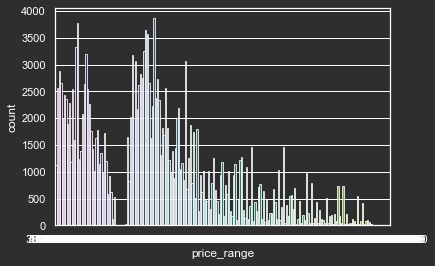

In [18]:
sns.countplot(x='price_range', data=df, palette='viridis', alpha=0.8)


In [19]:
plt.rcParams.update({
    'axes.linewidth': 1.5,   # Grosor de las líneas de los ejes
    'font.size': 12           # Tamaño de fuente general
})


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\3052640412.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attribute_property_type', y='attribute_baños', data=df, palette='plasma', alpha=0.9)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


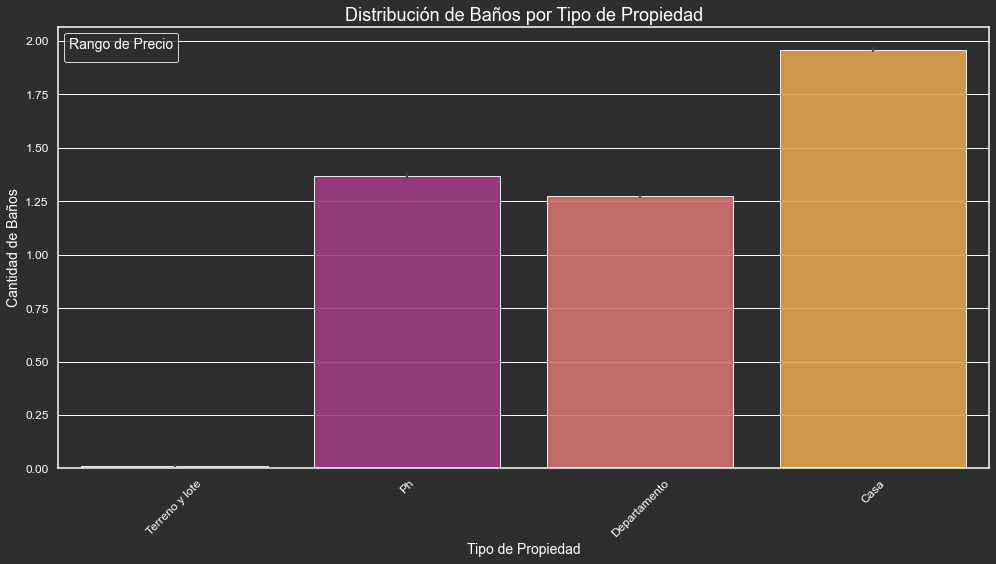

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'axes.facecolor': '#2E2E2E',
    'figure.facecolor': '#2E2E2E',
    'savefig.facecolor': '#2E2E2E',
    'axes.linewidth': 1.5,
    'font.size': 12
})

# Crear un gráfico de ejemplo
plt.figure(figsize=(14, 8))
sns.barplot(x='attribute_property_type', y='attribute_baños', data=df, palette='plasma', alpha=0.9)
plt.title('Distribución de Baños por Tipo de Propiedad', fontsize=18, color='white')
plt.xlabel('Tipo de Propiedad', fontsize=14)
plt.ylabel('Cantidad de Baños', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rango de Precio', fontsize=12, title_fontsize=14, facecolor='#2E2E2E', edgecolor='white')
plt.tight_layout()
plt.show()


C:\Users\lucki\AppData\Local\Temp\ipykernel_6544\510243316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='coolwarm')


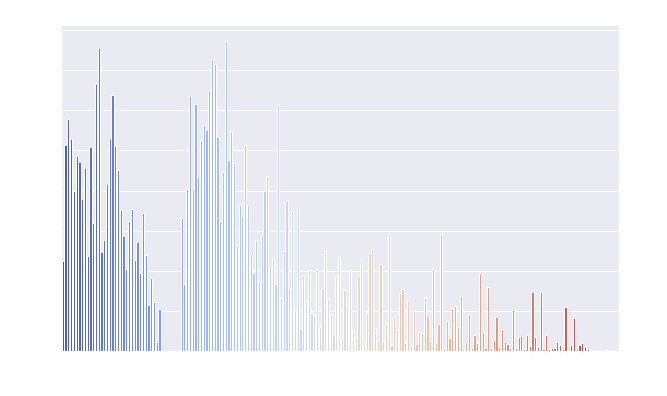

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar un tema oscuro predefinido
sns.set_theme(style="darkgrid")

# Crear un gráfico de ejemplo
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df, palette='coolwarm')
plt.title('Distribución de Price Range', fontsize=16, color='white')
plt.xlabel('Rango de Precio', fontsize=14, color='white')
plt.ylabel('Cantidad', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.show()


KeyError: "['price'] not found in axis"

KeyError: "['price.1'] not found in axis"

Información General del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192420 entries, 0 to 192419
Data columns (total 86 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        192420 non-null  int64  
 1   attribute_acceso                                  35777 non-null   object 
 2   attribute_acceso_a_internet                       108944 non-null  object 
 3   attribute_admite_mascotas                         55224 non-null   object 
 4   attribute_agua_corriente                          125621 non-null  object 
 5   attribute_aire_acondicionado                      101780 non-null  object 
 6   attribute_alarma                                  31395 non-null   object 
 7   attribute_ambientes                               126911 non-null  float64
 8   attribute_apto_crédito                           

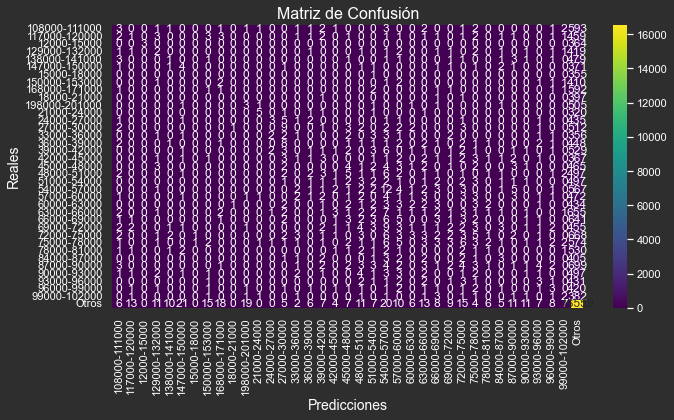

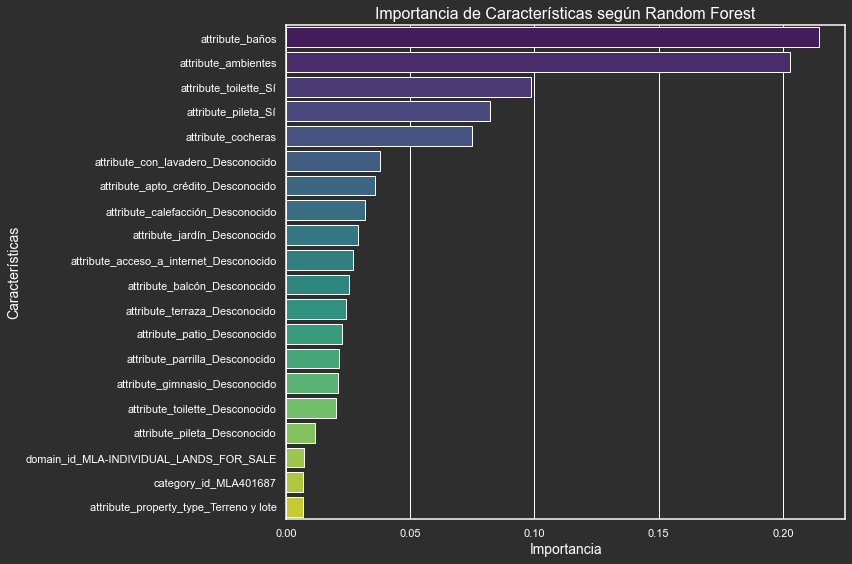

In [38]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos con texto blanco para fondo oscuro
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'figure.facecolor': '#2E2E2E',
    'axes.facecolor': '#2E2E2E',
    'savefig.facecolor': '#2E2E2E',
    'axes.linewidth': 1.5,
    'font.size': 12
})

# 1. Carga de Datos
# Reemplaza 'tu_archivo.csv' con la ruta a tu archivo de datos si no lo has cargado aún
df = pd.read_csv(r"D:\Tesis\bases_datos\real_estate_clean_ultimo.csv")
# Asumiendo que ya tienes el DataFrame `df` cargado
df = df.drop(columns=['price.1','seller_address_id', 'seller_id'])

# Si ya lo tienes cargado, puedes comentar la línea anterior

# 2. Exploración Inicial
print("Información General del DataFrame:")
print(df.info())

print("\nDescripción Estadística:")
print(df.describe(include='all'))

# 3. Verificación del Tipo de Variable Objetivo
print("\nValores Únicos de 'price_range':")
print(df['price_range'].unique())
print("\nTipo de Dato de 'price_range':", df['price_range'].dtype)

# 4. Limpieza de Datos

# a. Eliminar Columnas Irrelevantes
columns_to_drop = ['price', 'superficie_total', 'Unnamed: 0']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# b. Manejo de Valores Nulos
# Identificar columnas con más del 50% de valores nulos y eliminarlas
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Identificar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'price_range']  # Excluir variable objetivo

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# c. Reducir la Cardinalidad de Variables Categóricas
# Definir un umbral para considerar una categoría como 'Otros'
def reduce_cardinality(data, threshold=0.01):
    """
    Reemplaza las categorías que representan menos del threshold de frecuencia con 'Otros'.
    """
    freq = data.value_counts(normalize=True)
    categories_to_keep = freq[freq >= threshold].index
    return data.apply(lambda x: x if x in categories_to_keep else 'Otros')

for col in categorical_cols:
    if df[col].nunique() > 20:  # Puedes ajustar el umbral según tus necesidades
        df[col] = reduce_cardinality(df[col], threshold=0.01)

# d. Imputar Valores Faltantes

# Imputar numéricas con mediana
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputar categóricas con 'Desconocido'
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Desconocido')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# e. Eliminar Filas Duplicadas
df = df.drop_duplicates()

# f. Conversión de Tipos de Datos
# Convertir columnas de fecha a datetime
fecha_cols = ['date_created', 'last_updated']
for col in fecha_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        # Imputar fechas faltantes con la fecha actual
        df[col].fillna(pd.Timestamp('today'), inplace=True)

# g. Creación de Nuevas Variables Temporales
for col in fecha_cols:
    if col in df.columns:
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day

# 5. Preparación para el Modelo de Clasificación

# a. Codificación de la Variable Objetivo
# Dado que 'price_range' es categórica, usaremos Label Encoding
le = LabelEncoder()
df['price_range_encoded'] = le.fit_transform(df['price_range'])

# b. Separar variables predictoras y objetivo
X = df.drop(['price_range', 'price_range_encoded'], axis=1)
y = df['price_range_encoded']

# c. Identificar columnas numéricas y categóricas después de la limpieza
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# d. Crear transformadores para preprocesamiento

# Para variables categóricas, usaremos One-Hot Encoding solo para columnas con baja cardinalidad
# y Target Encoding para las de alta cardinalidad. Aquí, ya hemos reducido la cardinalidad.

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# e. Crear Pipeline completo con selección de características
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=20)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 6. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Entrenamiento del Modelo
pipeline.fit(X_train, y_train)

# 8. Evaluación del Modelo
y_pred = pipeline.predict(X_test)

print("\nEvaluación del Modelo de Clasificación (Random Forest):")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 9. Identificación de las Variables Más Relevantes
# Obtener nombres de las características seleccionadas
feature_selector = pipeline.named_steps['feature_selection']
preprocessor_fit = pipeline.named_steps['preprocessor'].fit(X_train, y_train)

# Obtener nombres de las características después de preprocesamiento
onehot_features = pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_features)

# Obtener las mejores características
selected_mask = feature_selector.get_support()
selected_features = np.array(all_features)[selected_mask]

print("\nCaracterísticas Seleccionadas para el Modelo:")
for feature in selected_features:
    print(feature)

# 10. Visualización de Resultados (Opcional)

# a. Gráfico de Predicciones vs Valores Reales
# Para clasificación, podríamos visualizar la matriz de confusión o la distribución de clases
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicciones', fontsize=14)
plt.ylabel('Reales', fontsize=14)
plt.tight_layout()
plt.show()

# b. Importancia de Características (Random Forest)
importances = pipeline.named_steps['classifier'].feature_importances_
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Importancia de Características según Random Forest', fontsize=16)
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.tight_layout()
plt.show()


In [39]:
feature_importance

attribute_baños                            0.214453
attribute_ambientes                        0.203064
attribute_toilette_Sí                      0.098437
attribute_pileta_Sí                        0.081925
attribute_cocheras                         0.074748
attribute_con_lavadero_Desconocido         0.037638
attribute_apto_crédito_Desconocido         0.035844
attribute_calefacción_Desconocido          0.031734
attribute_jardín_Desconocido               0.028953
attribute_acceso_a_internet_Desconocido    0.026946
attribute_balcón_Desconocido               0.025306
attribute_terraza_Desconocido              0.023931
attribute_patio_Desconocido                0.022672
attribute_parrilla_Desconocido             0.021347
attribute_gimnasio_Desconocido             0.020796
attribute_toilette_Desconocido             0.020180
attribute_pileta_Desconocido               0.011456
domain_id_MLA-INDIVIDUAL_LANDS_FOR_SALE    0.007052
category_id_MLA401687                      0.006901
attribute_pr

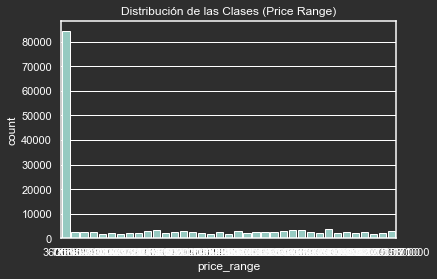

In [40]:
# Ver distribución de clases en los datos de entrenamiento
sns.countplot(x='price_range', data=df)
plt.title('Distribución de las Clases (Price Range)')
plt.show()


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

# Obtener las probabilidades de la predicción
y_proba = pipeline.predict_proba(X_test)

# Calcular el ROC-AUC score para las clases
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc:.2f}')


ROC-AUC Score: 0.71


In [42]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Definir GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score de validación cruzada: {grid_search.best_score_:.2f}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nEvaluación del Mejor Modelo después de GridSearchCV:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores parámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Mejor score de validación cruzada: 0.48

Evaluación del Mejor Modelo después de GridSearchCV:
[[    0     0     0 ...     0     0   617]
 [    0     0     0 ...     0     0   487]
 [    0     0     0 ...     0     0   367]
 ...
 [    0     0     0 ...     0     0   442]
 [    0     0     0 ...     0     0   400]
 [    0     0     0 ...     0     0 16860]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       617
           1       0.00      0.00      0.00       487
           2       0.00      0.00      0.00       367
           3       0.00      0.00      0.00       436
           4       0.00      0.00      0.00       495
           5       0.00      0.00      0.00       386
           6       0.00      0.00      0.00   

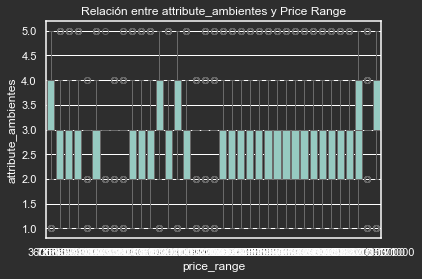

In [43]:
# Graficar la relación de las características seleccionadas con el price_range
top_feature = selected_features[0]  # Tomar la característica más importante
sns.boxplot(x='price_range', y=top_feature, data=df)
plt.title(f'Relación entre {top_feature} y Price Range')
plt.show()


In [44]:
# Crear nuevas interacciones entre las características
df['metros_por_ambiente'] = df['attribute_superficie_total'] / df['attribute_ambientes']
df['metros_por_baño'] = df['attribute_superficie_total'] / df['attribute_baños']

# Reentrenar el modelo con estas nuevas características


TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [52]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para aumentar las muestras de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar nuevamente el modelo con los datos balanceados
pipeline.fit(X_resampled, y_resampled)


ValueError: could not convert string to float: 'No'

In [46]:
# Ajustar el modelo para considerar pesos de clase
classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [47]:
import joblib

# Guardar el modelo entrenado
joblib.dump(pipeline, 'modelo_random_forest_price_range.pkl')
print("Modelo guardado como 'modelo_random_forest_price_range.pkl'.")

# Cargar el modelo para hacer predicciones futuras
pipeline_cargado = joblib.load('modelo_random_forest_price_range.pkl')
y_pred_future = pipeline_cargado.predict(X_test)


Modelo guardado como 'modelo_random_forest_price_range.pkl'.


## PREDIGO NUEVOS DATOS

In [56]:
dfvb = df.head(300)
dfvb.to_excel("testeo_columnas.xlsx")

In [49]:
# Convertir los valores numéricos predichos de nuevo a los rangos de precios originales
predicciones_originales = le.inverse_transform(predicciones)

# Ver las predicciones originales
print(predicciones_originales)


NameError: name 'predicciones' is not defined

In [50]:
import pandas as pd
import joblib

# Cargar el modelo entrenado y el LabelEncoder
pipeline = joblib.load('modelo_random_forest_price_range.pkl')

# Cargar los datos de nuevas propiedades

# Asegúrate de que los datos estén bien formateados y que no haya columnas objetivo
# Aplicar el preprocesamiento del pipeline y realizar la predicción
predicciones = pipeline.predict(nuevas_propiedades)

# Si deseas obtener los nombres originales de las clases, puedes utilizar el LabelEncoder inverso
predicciones_originales = le.inverse_transform(predicciones)

# Mostrar las predicciones
for i, prediccion in enumerate(predicciones_originales):
    print(f"Propiedad {i+1}: {prediccion}")


FileNotFoundError: [Errno 2] No such file or directory: 'nuevas_propiedades.csv'